# <div align="center">Object Localization and Detection</div>
---------------------------------------------------------------------

you can Find me on Github:
> ###### [ GitHub](https://github.com/lev1khachatryan)

<img src="asset/3/main.png" />

It can be challenging for beginners to distinguish between different related computer vision tasks.

For example, image classification is straight forward, but the differences between object localization and object detection can be confusing, especially when all three tasks may be just as equally referred to as object recognition.

Image classification involves assigning a class label to an image, whereas object localization involves drawing a bounding box around one or more objects in an image. Object detection is more challenging and combines these two tasks and draws a bounding box around each object of interest in the image and assigns them a class label. Together, all of these problems are referred to as object recognition.

In this notebook, you will discover a gentle introduction to the problem of object recognition and state-of-the-art deep learning models designed to address it.

After reading this post, you will know:

* Object recognition is refers to a collection of related tasks for identifying objects in digital photographs.


* Region-Based Convolutional Neural Networks, or ***R-CNNs***, are a family of techniques for addressing object localization and recognition tasks, designed for model performance.


* You Only Look Once, or ***YOLO***, is a second family of techniques for object recognition designed for speed and real-time use.

# <div align="center">Overview</div>
---------------------------------------------------------------------

This tutorial is divided into three parts; they are:

* What is Object Recognition?


* R-CNN Model Family


* YOLO Model Family

# <div align="center">What is Object Recognition?</div>
---------------------------------------------------------------------

Object recognition is a general term to describe a collection of related computer vision tasks that involve identifying objects in digital photographs.

* Image classification involves predicting the class of one object in an image. 


* Object localization refers to identifying the location of one or more objects in an image and drawing a bounding box around their extent. Object detection combines these two tasks and localizes and classifies one or more objects in an image.

When a user or practitioner refers to “object recognition“, they often mean “object detection“.

… we will be using the term object recognition broadly to encompass both image classification (a task requiring an algorithm to determine what object classes are present in the image) as well as object detection (a task requiring an algorithm to localize all objects present in the image

As such, we can distinguish between these three computer vision tasks:

* Image Classification: Predict the type or class of an object in an image.
    * Input: An image with a single object, such as a photograph.
    * Output: A class label (e.g. one or more integers that are mapped to class labels).


* Object Localization: Locate the presence of objects in an image and indicate their location with a bounding box.
    * Input: An image with one or more objects, such as a photograph.
    * Output: One or more bounding boxes (e.g. defined by a point, width, and height).


* Object Detection: Locate the presence of objects with a bounding box and types or classes of the located objects in an image.
    * Input: An image with one or more objects, such as a photograph.
    * Output: One or more bounding boxes (e.g. defined by a point, width, and height), and a class label for each bounding box.

One further extension to this breakdown of computer vision tasks is ***object segmentation***, also called “object instance segmentation” or “semantic segmentation,” where ***instances of recognized objects are indicated by highlighting the specific pixels*** of the object instead of a coarse bounding box.

From this breakdown, we can see that object recognition refers to a suite of challenging computer vision tasks.

<img src="asset/3/1.png" />

Most of the recent innovations in image recognition problems have come as part of participation in the ***ILSVRC tasks***.

This is an annual academic competition with a separate challenge for each of these three problem types, with the intent of fostering independent and separate improvements at each level that can be leveraged more broadly. For example, see the list of the three corresponding task types below taken from the 2015 ILSVRC review paper:

* Image classification: Algorithms produce a list of object categories present in the image.


* Single-object localization: Algorithms produce a list of object categories present in the image, along with an axis-aligned bounding box indicating the position and scale of one instance of each object category.


* Object detection: Algorithms produce a list of object categories present in the image along with an axis-aligned bounding box indicating the position and scale of every instance of each object category.

We can see that “Single-object localization” is a simpler version of the more broadly defined “Object Localization,” constraining the localization tasks to objects of one type within an image, which we may assume is an easier task.

Below is an example comparing single object localization and object detection, taken from the ILSVRC paper. Note the difference in ground truth expectations in each case.

<img src="asset/3/2.png" />

- The performance of a model for image classification is evaluated using the mean classification error across the predicted class labels. 


- The performance of a model for single-object localization is evaluated using the distance between the expected and predicted bounding box for the expected class. 


- Whereas the performance of a model for object recognition is evaluated using the ***precision and recall*** across each of the best matching bounding boxes for the known objects in the image.

### <div align="center">Object Localization</div>
---------------------------------------------------------------------

With object localization the network identifies where the object is, putting a bounding box around it.

This is what is called “classification with localization”. Later on, we’ll see the “detection” problem, which takes care of detecting and localizing multiple objects within the image.

But first things first.

For an object localization problem, we start off using the same network we saw in image classification. So, we have an image as an input, which goes through a ConvNet that results in a vector of features fed to a softmax to classify the object (for example with 4 classes for pedestrians/cars/bike/background). Now, if we want to localize those objects in the image as well, we change the neural network to have a few more output units that encompass a bounding box. In particular, we add four more numbers, which identify the x and y coordinates of the upper left corner and the height and width of the box (bx, by, bh, bw).

The neural network now will output the above four numbers, plus the probability of class labels (also four in our case). Therefore, the target label will be:

<img src='asset/3/ddxk_1.png'>

Where pc is the confidence of an object to be in the image. It responds to the question “is there an object?” Instead, c1,c2,c3, in case there is an object, tell if the object is part of class 1, 2 or 3. So, it tells us which object it is. Finally, bx, by, bh, bw identify the coordinates related to the bounding box around the detected object.

For example, if an image has a car, the target label will be:

<img src='asset/3/ddxk_2.png'>

In case the network doesn’t detect an object, the output is simply:

<img src='asset/3/ddxk_3.png'>

Where the question marks are placed in the rest of the positions that don’t provide any meaning in this case. Technically the network will output big numbers or NaN in these positions.

This technique is also used for ***“Landmarks detection”***. In this case, the output will be even bigger since we ask the network to output the x and y coordinates of important points within an image. For example, think about an application for detecting key landmarks of a face. In this situation, we could identify points along the face that denote, for example, the corners of the eyes, the mouth, etc.

### <div align="center">Object Detection</div>
---------------------------------------------------------------------

Object detection can be performed using a technique called ***“sliding window detection”***. We train a ConvNet to detect objects within an image and use windows of different sizes that we slide on top of it. For each window, we perform a prediction.

This method gives pretty good results.

The big downside of it is the computational cost, which is very extensive since we can have a lot of windows. The solution to that is the sliding window detection computed convolutionally.

Instead of sliding a small squeegee to clean a window, we now have a big one that fits the entire window and magically cleans it completely without any movement.

Let’s check this out!

The first step to build up towards the convolutional implementation of sliding windows is to turn the Fully Connected layers in a neural network into convolutional layers. See example below:

<img src='asset/3/ddxk_4.png'>

Great, now to simplify the representation, let’s re-sketch the final network in 2D:

<img src='asset/3/ddxk_5.png'>

If our test image is of dimension 16x16x3 and we had to perform the “regular” sliding window we would have to create 4 different windows of size 14x14x3 out of the original test image and run each one through the ConvNet.

<img src='asset/3/ddxk_6.png'>

This is computationally expensive and a lot of this computation is duplicative. We would like, instead, to have these four passes to share computation.

So, with the convolutional implementation of sliding windows we run the ConvNet, with the same parameters and same filters on the test image and this is what we get:

<img src='asset/3/ddxk_7.png'>

Each of the 4 subsets of the output unit is essentially the result of running the ConvNet with a 14x14x3 region in the four positions on the initial 16x16x3 image.

You might be wondering if this works on other examples too, and it does.

Think about an input image of 28x28x3. Going through the network, we arrive at the final output of 8x8x4. In this one, each of the 8 subsets corresponds to running the 14x14x3 region 8 times with a slide of 2 in the original image.

One of the weaknesses of this implementation is that the position of the bounding box we get around the detected object is not overly accurate.

We will soon see that the YOLO algorithm is the solution to that.

Now that we are familiar with the problem of object localization and detection, let’s take a look at some recent top-performing deep learning models.

# <div align="center">R-CNN Model Family</div>
---------------------------------------------------------------------

The R-CNN family of methods refers to the R-CNN, which may stand for “Regions with CNN Features” or “Region-Based Convolutional Neural Network,” developed by Ross Girshick, et al.

This includes the techniques ***R-CNN, Fast R-CNN, and Faster-RCNN*** designed and demonstrated for object localization and object recognition.

This algorithms tries to pick few regions within the image, which make sense to run the classifier. As for some regions of the image that contain no objects, it makes no sense to run the ConvNet classifier.

So first we need to find a way to find out where the objects are. We can do so by running a segmentation algorithm, which identifies blobs around objects. Then, we place a bounding box around each blob and run the classifier for each of these bounding boxes. It is a pretty slow algorithm as it proposes some regions and it classifies them one at a time.

To speed it out there, has been proposed the “fast R-CNN” algorithm. For this one, we still have the first step, which proposes the regions, but then it uses the convolution implementation of sliding windows to classify all the proposed regions.

Well, the first step is still a bit annoyingly slow, right?

Why not a “faster R-CNN”? Yes, it exists.

This one replaces the first step with the use of a convolutional network to propose regions.

Let’s take a closer look at the highlights of each of these techniques in turn.

### <div align="center">R-CNN</div>
---------------------------------------------------------------------

The R-CNN was described in the 2014 paper by Ross Girshick, et al. from UC Berkeley titled [“Rich feature hierarchies for accurate object detection and semantic segmentation.”](https://arxiv.org/abs/1311.2524)

It may have been one of the first large and successful application of convolutional neural networks to the problem of object localization, detection, and segmentation. The approach was demonstrated on benchmark datasets, achieving then state-of-the-art results on the VOC-2012 dataset and the 200-class ILSVRC-2013 object detection dataset.

Their proposed R-CNN model is comprised of three modules; they are:

- Module 1: Region Proposal. Generate and extract category independent region proposals, e.g. candidate bounding boxes.


- Module 2: Feature Extractor. Extract feature from each candidate region, e.g. using a deep convolutional neural network.


- Module 3: Classifier. Classify features as one of the known class, e.g. linear SVM classifier model.


The architecture of the model is summarized in the image below, taken from the paper.

<img src="asset/3/3.png" />

A computer vision technique is used to propose candidate regions or bounding boxes of potential objects in the image called ***“selective search”***, although the flexibility of the design allows other region proposal algorithms to be used.

The feature extractor used by the model was the ***AlexNet deep CNN*** that won the ILSVRC-2012 image classification competition. The output of the CNN was a 4,096 element vector that describes the contents of the image that is fed to a linear SVM for classification, specifically one SVM is trained for each known class.

It is a relatively simple and straightforward application of CNNs to the problem of object localization and recognition. A downside of the approach is that it is slow, requiring a CNN-based feature extraction pass on each of the candidate regions generated by the region proposal algorithm. This is a problem as the paper describes the model operating upon approximately 2,000 proposed regions per image at test-time.

Python (Caffe) and MatLab source code for R-CNN as described in the paper was made available in the R-CNN GitHub repository.

### <div align="center">Fast R-CNN</div>
---------------------------------------------------------------------

Given the great success of R-CNN, Ross Girshick, then at Microsoft Research, proposed an extension to address the speed issues of R-CNN in a 2015 paper titled “Fast R-CNN.”

The paper opens with a review of the limitations of R-CNN, which can be summarized as follows:

* Training is a multi-stage pipeline. Involves the preparation and operation of three separate models.


- Training is expensive in space and time. Training a deep CNN on so many region proposals per image is very slow.


- Object detection is slow. Make predictions using a deep CNN on so many region proposals is very slow.

A prior work was proposed to speed up the technique called spatial pyramid pooling networks, or SPPnets, in the 2014 paper “Spatial Pyramid Pooling in Deep Convolutional Networks for Visual Recognition.” This did speed up the extraction of features, but essentially used a type of forward pass caching algorithm.

Fast R-CNN is proposed as a single model instead of a pipeline to learn and output regions and classifications directly.

The architecture of the model takes the photograph a set of region proposals as input that are passed through a deep convolutional neural network. A pre-trained CNN, such as a VGG-16, is used for feature extraction. The end of the deep CNN is a custom layer called a Region of Interest Pooling Layer, or RoI Pooling, that extracts features specific for a given input candidate region.

The output of the CNN is then interpreted by a fully connected layer then the model bifurcates into two outputs, one for the class prediction via a softmax layer, and another with a linear output for the bounding box. This process is then repeated multiple times for each region of interest in a given image.

The architecture of the model is summarized in the image below, taken from the paper.

<img src="asset/3/4.png" />

The model is significantly faster to train and to make predictions, yet still requires a set of candidate regions to be proposed along with each input image.

Python and C++ (Caffe) source code for Fast R-CNN as described in the paper was made available in a GitHub repository.

### <div align="center">Faster R-CNN</div>
---------------------------------------------------------------------

The model architecture was further improved for both speed of training and detection by Shaoqing Ren, et al. at Microsoft Research in the 2016 paper titled “Faster R-CNN: Towards Real-Time Object Detection with Region Proposal Networks.”

The architecture was the basis for the first-place results achieved on both the ILSVRC-2015 and MS COCO-2015 object recognition and detection competition tasks.

The architecture was designed to both propose and refine region proposals as part of the training process, referred to as a Region Proposal Network, or RPN. These regions are then used in concert with a Fast R-CNN model in a single model design. These improvements both reduce the number of region proposals and accelerate the test-time operation of the model to near real-time with then state-of-the-art performance.

Although it is a single unified model, the architecture is comprised of two modules:

* Module 1: Region Proposal Network. Convolutional neural network for proposing regions and the type of object to consider in the region.


* Module 2: Fast R-CNN. Convolutional neural network for extracting features from the proposed regions and outputting the bounding box and class labels.

Both modules operate on the same output of a deep CNN. The region proposal network acts as an attention mechanism for the Fast R-CNN network, informing the second network of where to look or pay attention.

The architecture of the model is summarized in the image below, taken from the paper.

<img src="asset/3/5.png" />

The RPN works by taking the output of a pre-trained deep CNN, such as VGG-16, and passing a small network over the feature map and outputting multiple region proposals and a class prediction for each. Region proposals are bounding boxes, based on so-called anchor boxes or pre-defined shapes designed to accelerate and improve the proposal of regions. The class prediction is binary, indicating the presence of an object, or not, so-called “objectness” of the proposed region.

A procedure of alternating training is used where both sub-networks are trained at the same time, although interleaved. This allows the parameters in the feature detector deep CNN to be tailored or fine-tuned for both tasks at the same time.

At the time of writing, this Faster R-CNN architecture is the pinnacle of the family of models and continues to achieve near state-of-the-art results on object recognition tasks. A further extension adds support for image segmentation, described in the paper 2017 paper “Mask R-CNN.”

Python and C++ (Caffe) source code for Fast R-CNN as described in the paper was made available in a GitHub repository.

# <div align="center">YOLO Model Family</div>
---------------------------------------------------------------------

Another popular family of object recognition models is referred to collectively as YOLO or “You Only Look Once,” developed by Joseph Redmon, et al.

The R-CNN models may be generally more accurate, yet the YOLO family of models are fast, much faster than R-CNN, achieving object detection in real-time.

### <div align="center">YOLO (you only look once)</div>
---------------------------------------------------------------------

We start with placing a grid on top of the input image. Then, for each of the grid cells, we run the classification and localization algorithm we saw at the beginning of the notebook. The labels for training, for each grid cell, will be similar to what we saw earlier, with an 8-dimensional output vector:

<img src='asset/3/ddxk_8.png'>

For each cell, we will get a result whether there is an object or not. For example:

<img src='asset/3/ddxk_9.png'>

The model works by first splitting the input image into a grid of cells, where each cell is responsible for predicting a bounding box if the center of a bounding box falls within it. Each grid cell predicts a bounding box involving the x, y coordinate and the width and height and the confidence. A class prediction is also based on each cell.

For example, an image may be divided into a 7×7 grid and each cell in the grid may predict 2 bounding boxes, resulting in 94 proposed bounding box predictions. The class probabilities map and the bounding boxes with confidences are then combined into a final set of bounding boxes and class labels. The image taken from the paper below summarizes the two outputs of the model.

<img src="asset/3/6.png" />

The object is “assigned” to the specific cell looking to where the center falls.

If we have a 3x3 grid cell, then the target output volume will have a dimension of 3x3x8 (where 8 is the number of labels in y). So, in this case, we will run the input image through a ConvNet to map to an output of 3x3x8 volume.

So we have a convolutional implementation for the entire grid cells (not 9 individual ones), as we saw earlier. We, therefore, combine what we saw in the localization classification algorithm with the convolutional implementation.

The advantage of this algorithm is that it outputs precise positions of bounding boxes, as the values bx, by, bh, bw are computed relative to the cell. So, the finer grid we have the more precision we can obtain and also we have fewer chances of having multiple objects within a cell.

### Intersection over Union (IoU)

This is a way of measuring if the object detection algorithm is working well.

It computes the intersection over the union of the detected bounding box and the correct one.

Therefore:

<img src='asset/3/ddxk_10.png'>

We identify a benchmark and consider an accurate object detection if the result of IoU is above that specific value. (i.e. IoU >= 0.5)

Clearly, the higher the IoU value, the more accurate results we have.

### Non-max suppression

This technique is used to make our YOLO algorithm perform better.

In fact, YOLO could detect an object multiple times, since it’s possible that many grid cells detect the object. To avoid that, we take the following steps:

First, we assign a probability on each detection, then we take the “largest probability” box. We now look at the boxes that overlap the most with the “largest probability” box and remove the ones that have high IoU (so the ones that have a big area of intersection). Finally, the remaining box is the correct detection.

Remember that each prediction comes with a value pc, which identifies the prediction probability. We now discard, for example, all the boxes with pc <= 0.6.

While there are any remaining boxes then we do:

* pick the box with the largest pc. Output that as prediction.


* discard any remaining box with IoU>=0.5 with respect to the box output in the previous step.

If we have multiple classes (objects), then we implement non-max suppression independently for each one.

### Anchor boxes

One of the problems with object detections as we have seen so far is the fact that each grid cell can only detect one object. If we have instead multiple objects in the same cell, the techniques we have used so far won’t help to discern them. Anchor boxes will help us overcome this issue.

The idea here is to predefine different shapes (called anchor boxes) for each object and associate predictions to each one of them. Our output label now will contain 8 dimensions for each of the anchor boxes we predefined.

If we chose two anchor boxes, then the class label will be:

<img src='asset/3/ddxk_11.png'>

So each object in the training image was assigned to the grid cell that contained that object’s midpoint (for a 3x3 grid, the output was 3x3x8). Now, each object in the training image is assigned to the grid cell that contains that object’s midpoint and the anchor box for the grid cell with highest IoU.

(for a 3x3 grid and 2 anchor boxes, the output is 3x3x16).

The only thing it can not handle well is in case two objects in the same cell have the same anchor box. Additionally, we get to choose and redefine the shape of the anchor boxes.

### Putting it all together for YOLO

Quick tips when implementing the YOLO algorithm:

* decide the grid size and the number of anchor boxes (as these two variables drive the dimension of the output volume y).


* Train the ConvNet on the training images.


* Run non-max suppression.

# <div align="center">Example (Open Image 2019)</div>
---------------------------------------------------------------------

In [2]:
# some basic understanding of the data and pre-processing for later functions consumption
import os
print(os.listdir("input/3"))

['sample_submission.csv', 'test']


## Helper functions



In [4]:
# image helper functions
def get_image_file_path(image_file_name):
    """returns the path of image file"""
    return 'input/3/test/' + image_file_name

def get_images(n):
    """reads all the files from `../input/test` directory and returns paths for n files from top"""
    all_image_files = os.listdir("input/3/test/")
    # let's save all these image paths for later
    image_paths = list(map(get_image_file_path, all_image_files))
    # rather than using all, we will use a subset of these image paths for working on our model
    image_paths = image_paths[:n]
    return image_paths

def get_image_id_from_path(image_path):
    """returns image id from image path"""
    return image_path.split('input/3/test/')[1].split('.jpg')[0]

In [5]:
# quick sanity check
print(get_images(10))
print(get_image_id_from_path(get_images(1)[0]))

['input/3/test/00000b4dcff7f799.jpg', 'input/3/test/00001a21632de752.jpg', 'input/3/test/0000d67245642c5f.jpg', 'input/3/test/0001244aa8ed3099.jpg', 'input/3/test/000172d1dd1adce0.jpg', 'input/3/test/0001c8fbfb30d3a6.jpg', 'input/3/test/0001dd930912683d.jpg', 'input/3/test/0002c96937fae3b3.jpg', 'input/3/test/0002f94fe2d2eb9f.jpg', 'input/3/test/000305ba209270dc.jpg']
00000b4dcff7f799


In [6]:
# submission helper functions
def get_prediction_string(result):
    with tf.device('/device:GPU:0'):
        """from each result, generates the complete prediction string in the format {Label Confidence XMin YMin XMax YMax},{...} based on submission file."""
        prediction_strings = []
        for index, score in enumerate(result['detection_scores']):
            index = int(index)
            single_prediction_string = ""
            single_prediction_string += result['detection_class_names'][index].decode("utf-8") + " "  + str(score) + " "
            single_prediction_string += " ".join(str(x) for x in result['detection_boxes'][index])
            prediction_strings.append(single_prediction_string)

        prediction_string = " ".join(str(x) for x in prediction_strings)
        return prediction_string

def get_prediction_entry(filepath, result):
    return {
        "ImageID": get_image_id_from_path(filepath),
        "PredictionString": get_prediction_string(result)
    }

In [8]:
# For running inference on the TF-Hub module.
import tensorflow as tf
import tensorflow_hub as hub

# For downloading the image.
import matplotlib.pyplot as plt
from six import BytesIO

# For drawing onto the image.
import numpy as np
import pandas as pd
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# For measuring the inference time.
import time

# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.test.gpu_device_name())

The following GPU devices are available: 


In [9]:
def display_image(image):
    fig = plt.figure(figsize=(20, 15))
    plt.grid(False)
    plt.imshow(image)


def draw_bounding_box_on_image(image,
                               ymin,
                               xmin,
                               ymax,
                               xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
    """Adds a bounding box to an image."""
    draw = ImageDraw.Draw(image)
    im_width, im_height = image.size
    (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                  ymin * im_height, ymax * im_height)
    draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
               (left, top)],
              width=thickness,
              fill=color)

    # If the total height of the display strings added to the top of the bounding
    # box exceeds the top of the image, stack the strings below the bounding box
    # instead of above.
    display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
    # Each display_str has a top and bottom margin of 0.05x.
    total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

    if top > total_display_str_height:
        text_bottom = top
    else:
        text_bottom = bottom + total_display_str_height
    # Reverse list and print from bottom to top.
    for display_str in display_str_list[::-1]:
        text_width, text_height = font.getsize(display_str)
        margin = np.ceil(0.05 * text_height)
        draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                        (left + text_width, text_bottom)],
                       fill=color)
        draw.text((left + margin, text_bottom - text_height - margin),
                  display_str,
                  fill="black",
                  font=font)
        text_bottom -= text_height - 2 * margin


def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1):
    """Overlay labeled boxes on an image with formatted scores and label names."""
    colors = list(ImageColor.colormap.values())

    try:
        font = ImageFont.truetype(
            "/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
            25)
    except IOError:
        print("Font not found, using default font.")
        font = ImageFont.load_default()

    for i in range(min(boxes.shape[0], max_boxes)):
        if scores[i] >= min_score:
            ymin, xmin, ymax, xmax = tuple(boxes[i].tolist())
            display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                           int(100 * scores[i]))
            color = colors[hash(class_names[i]) % len(colors)]
            image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
            draw_bounding_box_on_image(
                image_pil,
                ymin,
                xmin,
                ymax,
                xmax,
                color,
                font,
                display_str_list=[display_str])
            np.copyto(image, np.array(image_pil))
    return image

In [10]:
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"
image_path = "input/3/test/00000b4dcff7f799.jpg"

# with tf.device('/device:GPU:0'):
with tf.Graph().as_default():
    detector = hub.Module(module_handle)
    image_string_placeholder = tf.placeholder(tf.string)
    decoded_image = tf.image.decode_jpeg(image_string_placeholder)
    # Module accepts as input tensors of shape [1, height, width, 3], i.e. batch
    # of size 1 and type tf.float32.
    decoded_image_float = tf.image.convert_image_dtype(
        image=decoded_image, dtype=tf.float32)
    module_input = tf.expand_dims(decoded_image_float, 0)
    result = detector(module_input, as_dict=True)
    init_ops = [tf.global_variables_initializer(), tf.tables_initializer()]

    session = tf.Session()
    session.run(init_ops)

    # Load the downloaded and resized image and feed into the graph.
    with tf.gfile.Open(image_path, "rb") as binfile:
        image_string = binfile.read()

    result_out, image_out = session.run(
        [result, decoded_image],
        feed_dict={image_string_placeholder: image_string})
    print("Found %d objects." % len(result_out["detection_scores"]))

Found 100 objects.


Font not found, using default font.


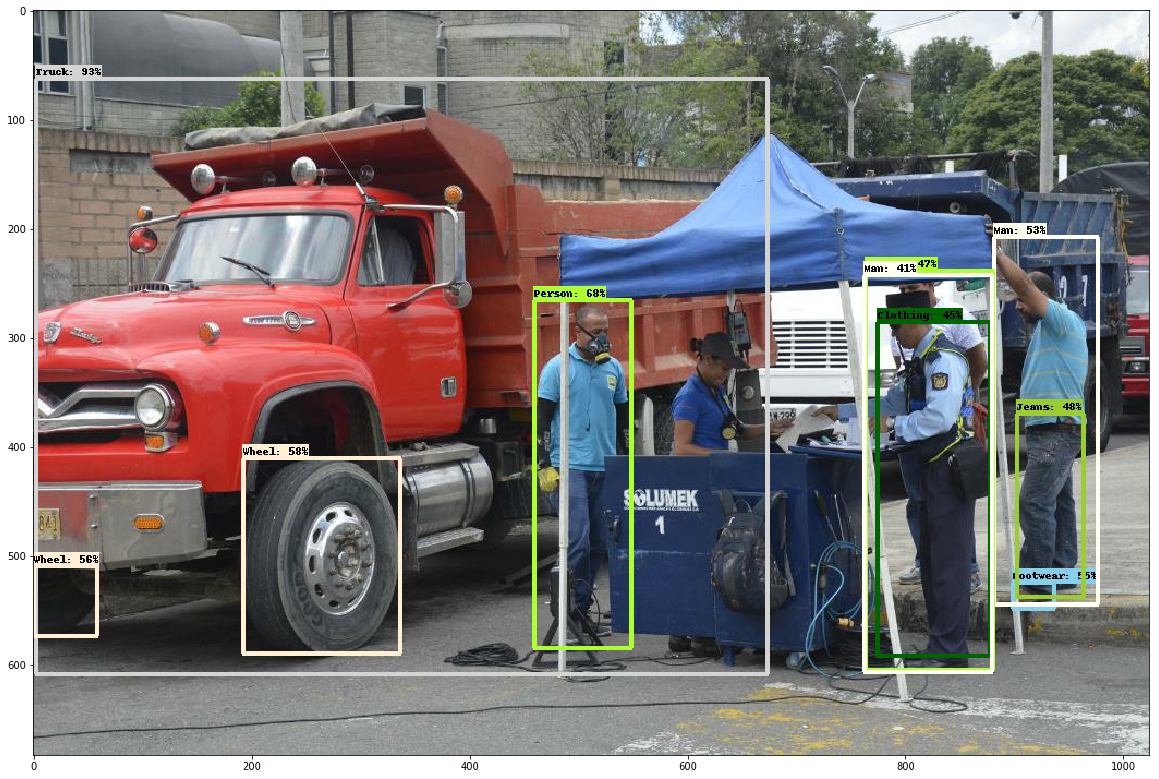

In [11]:
# see the sample image with bounding boxes
image_with_boxes = draw_boxes(
    np.array(image_out), result_out["detection_boxes"],
    result_out["detection_class_entities"], result_out["detection_scores"])
display_image(image_with_boxes)

In [ ]:
image_paths = get_images(10)
predictions = []

with tf.device('/device:GPU:0'):
    for image_path in image_paths:
        with tf.gfile.Open(image_path, "rb") as binfile:
            image_string = binfile.read()

        inference_start_time = time.clock()
        result_out, image_out = session.run(
            [result, decoded_image],
            feed_dict={image_string_placeholder: image_string})
        predictions.append(get_prediction_entry(image_path, result_out))
        print(f'For {image_path} found objects in {time.clock() - inference_start_time} seconds')

In [ ]:
predictions_df = pd.DataFrame(predictions)
predictions_df

In [ ]:
submission_df = pd.read_csv('input/3/sample_submission.csv')
submission_df.update(predictions_df)

In [ ]:
# NOTE: this is only on a subset of data
submission_df.to_csv('./10_values_submission.csv', index=False)